<a href="https://colab.research.google.com/github/ccplanet/GithupTest/blob/master/sklearn%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 基础验证法
# knn训练并打印准确率
import matplotlib.pyplot as plt #可视化模块
from sklearn.datasets import load_iris # iris数据集
from sklearn.model_selection import train_test_split # 分割数据模块
from sklearn.neighbors import KNeighborsClassifier # K最近邻(kNN，k-NearestNeighbor)分类算法

#加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

#分割数据并
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#建立模型
knn = KNeighborsClassifier()

#训练模型
knn.fit(X_train, y_train)

#将准确率打印出
print(knn.score(X_test, y_test))
# 0.973684210526

0.9736842105263158


In [6]:
# 交叉验证法
from sklearn.model_selection import cross_val_score # K折交叉验证模块
#使用K折交叉验证模块
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
#将5次的预测准确率打印出
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
#将5次的预测准确平均率打印出
print(scores.mean())
# 0.973333333333

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


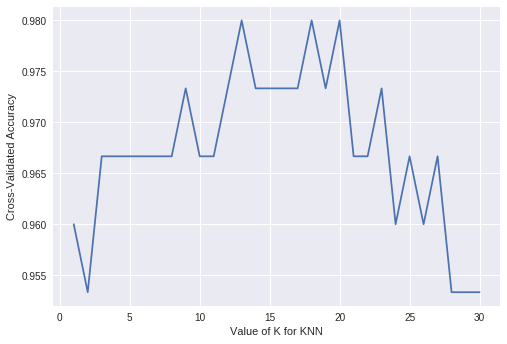

In [7]:
# 准确率交叉验证（分类方法常用）
#建立测试参数集
k_range = range(1, 31)
k_scores = []
#藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

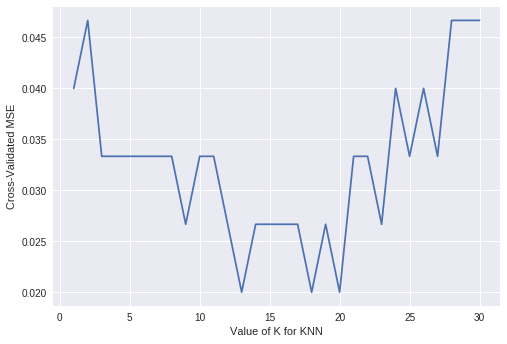

In [10]:
#均方误差交叉验证（回顾方法常用）
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()